<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p>
<p><font size="5" color='grey'> <b>
Unsupervised Learning - Apriori & FPGrowth - Basket
</b></font> </br></p>

---


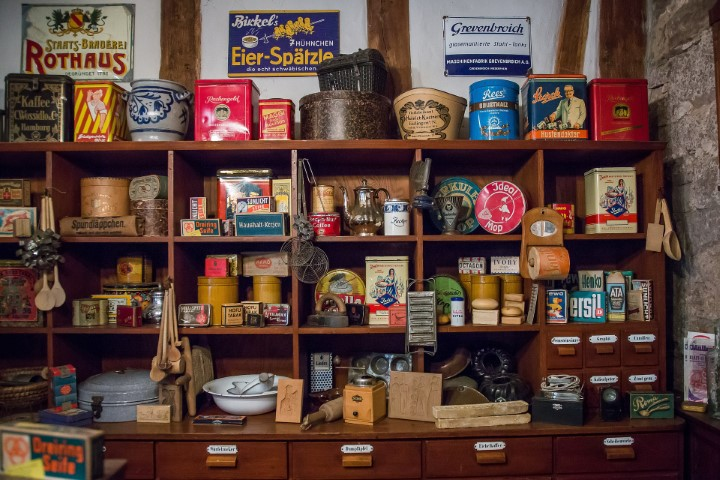

Bild von <a href="https://pixabay.com/de/users/maxmann-665103/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=2060616">Th G</a> auf <a href="https://pixabay.com/de//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=2060616">Pixabay</a>

# **1 <font color='orange'>|</font> Understand**
---


<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Aufgabe verstehen</br>
✅ Daten sammeln</br>
✅ Statistische Analyse (Min, Max, Mean, Korrelation, ...)</br>
✅ Datenvisualisierung (Streudiagramm, Box-Plot, ...)</br>
✅ Prepare Schritte festlegen</br>

<p><font color='black' size="5">
Warnungen ausstellen
</font></p>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
%%capture
try:
  from mlxtend.frequent_patterns import apriori
  from mlxtend.frequent_patterns import association_rules
  from mlxtend.preprocessing import TransactionEncoder
  from mlxtend.frequent_patterns.fpgrowth import fpgrowth
except:
  !pip install -q mlxtend --upgrade # Laufzeit neu starten!
  from mlxtend.frequent_patterns import apriori
  from mlxtend.frequent_patterns import association_rules
  from mlxtend.preprocessing import TransactionEncoder
  from mlxtend.frequent_patterns.fpgrowth import fpgrowth

<p><font color='black' size="5">
Lesen der Daten
</font></p>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Format 1
data = pd.read_csv('/content/Basket_01_Format_1.csv', header = None)

<p><font color='black' size="5">
EDA (Exploratory Data Analysis)
</font></p>


In [ ]:
data.info()

In [ ]:
data.head(5)

In [ ]:
data.shape

# **2 <font color='orange'>|</font> Prepare**

---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Nicht benötigte Features löschen</br>
✅ Datentyp ermitteln/ändern</br>
✅ Duplikate ermitteln/löschen</br>
✅ Missing Values behandeln</br>
✅ Ausreißer behandeln</br>
✅ Kategorischer Features codieren</br>
✅ Numerischer Features skalieren</br>
✅ Dimensionalität reduzieren</br>
✅ Datensampling (Over-/Undersampling)</br>
✅ Feature-Engineering (neue Features schaffen)</br>
✅ Pipeline erstellen/konfigurieren</br>

<p><font color='black' size="5">
Datenaufbereitung abhängig vom Format der Quelldaten
</font></p>

+ Format 1: csv-Datei, Item1, Item2, Item3, Item4, ..
+ Format 2: csv-Datei, Transaktions-Id, Item, <weitere Datenfelder wie Datum, Shop,...>
.

In [ ]:
#@title
#@markdown <p><font size="5" color='grey'> <b> Format 1</b></font> </br></p>
import numpy as np
data_new = []
for i in range(0, len(data)):                                              # Für alle Zeilen des DataFrames
  item_list = [str(n) for n in data.iloc[i][:] if str(n) != "nan"]
  data_new.append(list(item_list))

In [ ]:
#@title
#@markdown <p><font size="5" color='grey'> <b> Format 2</b></font> </br></p>
unique_transaction = data.Transaction.unique()
data_new = []
for index in unique_transaction:
  rows = data[data['Transaction'] == index]
  item_list = [n for n in rows['Item']]
  data_new.append(list(item_list))

<p><font color='black' size="5">
Erstelle eine True/False DataFrame mit den Items als Spalte
</font></p>

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(data_new).transform(data_new)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

# **3 <font color='orange'>|</font> Modeling**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Train-Test-Split erstellen</br>
✅ Modellauswahl treffen</br>
✅ Pipeline erweitern/konfigurieren</br>
✅ Training durchführen</br>

<p><font color='black' size="5">
Apriori
</font></p>

<p><font size="3">
Der Apriori-Algorithmus ist der beliebteste Algorithmus für das Mining von Assoziationsregeln. Er findet die häufigsten Kombinationen in einem Datenbestand.
<br>



<p><font color='black' size="5">
FPGrowth
</font></p>

<p><font size="3">
Die Idee hinter dem FP-Wachstumsalgorithmus besteht darin, häufige Itemsets in einem Datensatz zu finden und dabei schneller als der Apriori-Algorithmus zu sein. Der Apriori-Algorithmus geht grundsätzlich hin und her zum Datensatz, um das gemeinsame Vorkommen von Produkten im Datensatz zu prüfen.

Um schneller zu sein, änderte der FP-Algorithmus die Organisation der Daten in einen Baum anstatt in Mengen. Diese Baumdatenstruktur ermöglicht ein schnelleres Scannen, und hier gewinnt der Algorithmus Zeit.
<br>


# **4 <font color='orange'>|</font> Evaluate**
---


<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Prognose (Train, Test) erstellen</br>
✅ Modellgüte prüfen</br>
✅ Residuenanalyse erstellen</br>
✅ Feature Importance/Selektion prüfen</br>
✅ Robustheitstest erstellen</br>
✅ Modellinterpretation erstellen</br>
✅ Sensitivitätsanalyse erstellen</br>
✅ Kommunikation (Key Takeaways)</br>

<p><font color='black' size="5">
Ermittel Itemsets gemäß ParameterSet
</font></p>

Festlegung Support = Anzahl Item/Itemset an allen Transaktionen

In [ ]:
%%time
min_support = 0.01
frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
# frequent_itemsets

Festlegung Confidence = Wahrscheinlichkeit im Itemset enthalten

In [ ]:
min_confidence = 0.1
associationRulesSet =association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
associationRulesSet.head(-5)

---
**Leverage:**
Die Hebelwirkung (Leverage) berechnet die Differenz zwischen der beobachteten Häufigkeit des gemeinsamen Auftretens von Item {A} und Item {B} und der Häufigkeit, die zu erwarten wäre, wenn {A} und {B} unabhängig wären. Ein Hebelwert von 0 zeigt Unabhängigkeit an.

**Conviction:**
Ein hoher Überzeugungswert (Conviction) bedeutet, dass die Konsequenz stark von der Präzedenz abhängt. Beispielsweise wird im Fall eines perfekten Vertrauenswerts der Nenner 0 (aufgrund von 1 - 1), wofür der Überzeugungswert als „inf“ definiert wird. Ähnlich wie beim Lift ist die Überzeugung 1, wenn Items unabhängig sind.

Ermittlung Anzahl Items im Itemset

In [ ]:
associationRulesSet["an_len"] = associationRulesSet["antecedents"].apply(lambda x: len(x))
associationRulesSet["co_len"] = associationRulesSet["consequents"].apply(lambda x: len(x))
associationRulesSet.head(-5)

Auswahl von Items/Itemsets nach mehreren Kennzahlen

In [ ]:
associationRulesSet[(associationRulesSet['support'] >= 0.01) &
                    (associationRulesSet['confidence'] >=0.1)&
                    (associationRulesSet['an_len'] == 2)&
                    (associationRulesSet['lift'] >= 2.5) ]

Aufbereitung RuleSet

In [ ]:
for i , row in associationRulesSet.iterrows():
    if i <= 5:
      print(f"{i+1} - {list(row.antecedents)} -> {list(row.consequents)} = [support = {row.support} , \
    confidence = {row.confidence}, lift ={row.lift}] , dependent = {row.lift != 1.0}" )

FPGrowth

In [ ]:
%%time
frequent_itemsets_fpg = fpgrowth(df, min_support=min_support, use_colnames=True, max_len=None, verbose=0)

In [ ]:
min_confidence = 0.1
associationRulesSet =association_rules(frequent_itemsets_fpg, metric="confidence", min_threshold=min_confidence)
associationRulesSet.head(5)

# **5 <font color='orange'>|</font> Deploy**
---

<p><font color='black' size="5">📋 Checkliste</font></p>

✅ Modellexport und -speicherung</br>
✅ Abhängigkeiten und Umgebung</br>
✅ Sicherheit und Datenschutz</br>
✅ In die Produktion integrieren</br>
✅ Tests und Validierung</br>
✅ Dokumentation & Wartung</br>